# Warehouse Demand Analysis 

First 5 rows of the dataset:
   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500 

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB
None

Missing values in each column:
Product_Cod

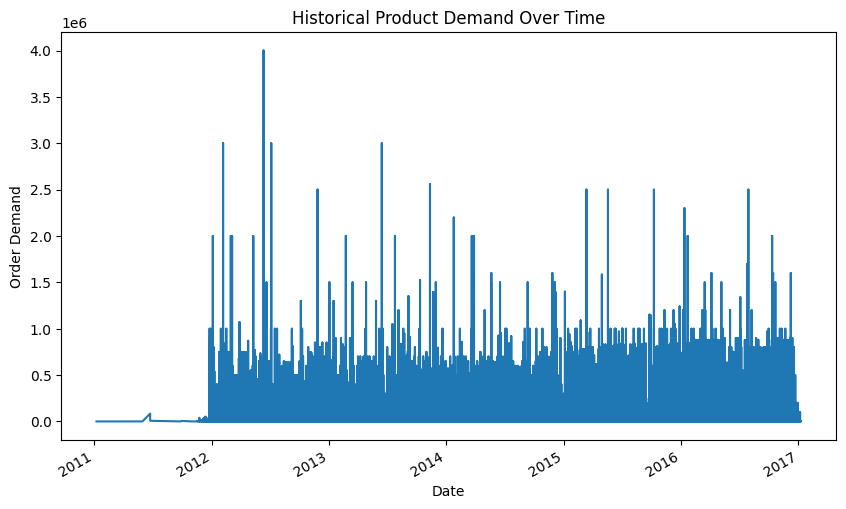

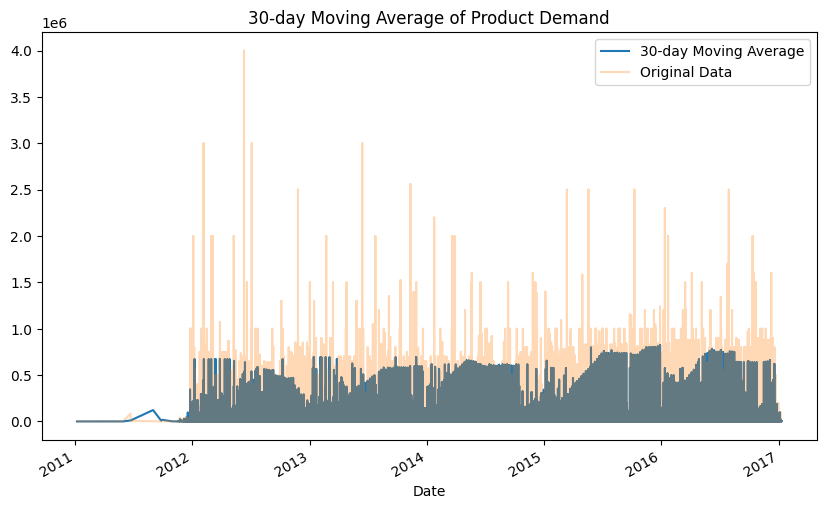

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Load the data
file_path = 'Historical Product Demand.csv'  # Update this with the correct path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the data
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Check basic info about the dataset (data types, missing values)
print("\nData types and missing values:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 3: Clean the data

# Handle missing dates (drop rows with missing dates)
df.dropna(subset=['Date'], inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert 'Order_Demand' to numeric (remove non-numeric values like negative signs or any text)
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'].str.replace(r'[^\d.]', ''), errors='coerce')

# Drop rows where 'Order_Demand' is still missing or invalid after conversion
df.dropna(subset=['Order_Demand'], inplace=True)

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

In [ ]:
# Exploratory Data Analysis (EDA)

Column names in the dataset:
Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

First few rows of the dataset:
   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500 

Checking for missing or invalid dates:
11239 missing dates

First few rows after handling dates:
   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028 2012-07-27         100 
1  Product_0979    Whse_J     Category_028 2012-01-19         500 
2  Product_0979    Whse_J     Category_028 2012-02-03         500 
3  Product_0979    Whse_J     Category_028 2012-02-09        

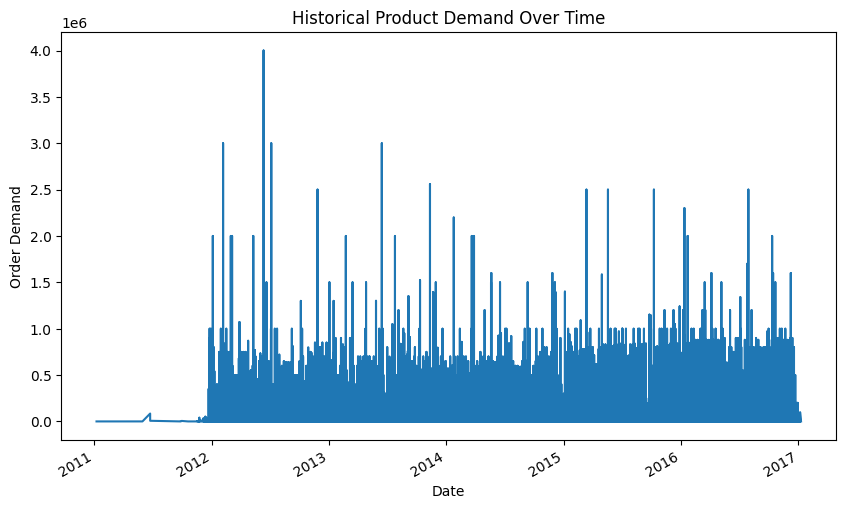

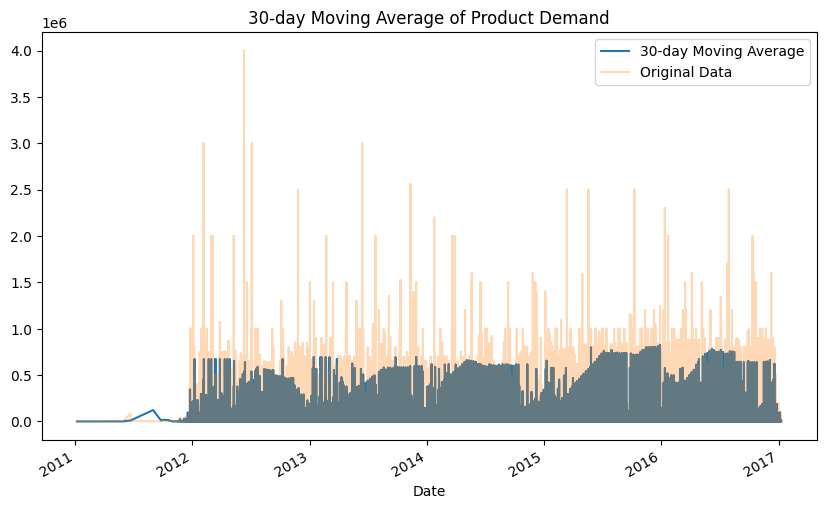

In [15]:
# Step 1: Load the data
file_path = 'Historical Product Demand.csv'  # Update this with the correct path if needed
df = pd.read_csv(file_path)

# Display column names and the first few rows of the dataset
print("Column names in the dataset:")
print(df.columns)
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 2: Check for any invalid or missing values in the 'Date' column
print("\nChecking for missing or invalid dates:")
print(df['Date'].isnull().sum(), "missing dates")

# Step 3: Convert the 'Date' column to datetime format (handle errors)
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce')

# Step 4: Drop rows with missing or invalid 'Date' values
df.dropna(subset=['Date'], inplace=True)

# Verify the changes
print("\nFirst few rows after handling dates:")
print(df.head())

# Step 5: Clean 'Order_Demand' - Convert it to numeric (handle non-numeric values)
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Drop rows where 'Order_Demand' is still missing after cleaning
df.dropna(subset=['Order_Demand'], inplace=True)

# Set 'Date' as the index for time-series analysis
df.set_index('Date', inplace=True)

# Step 6: Visualize the cleaned time-series data
plt.figure(figsize=(10, 6))
df['Order_Demand'].plot()
plt.title('Historical Product Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.show()

# Step 7: Moving average to identify trends
df['Demand_MA_30'] = df['Order_Demand'].rolling(window=30).mean()  # 30-day moving average
plt.figure(figsize=(10, 6))
df['Demand_MA_30'].plot(label='30-day Moving Average')
df['Order_Demand'].plot(alpha=0.3, label='Original Data')
plt.title('30-day Moving Average of Product Demand')
plt.legend()
plt.show()

In [ ]:
# Trend Analysis:

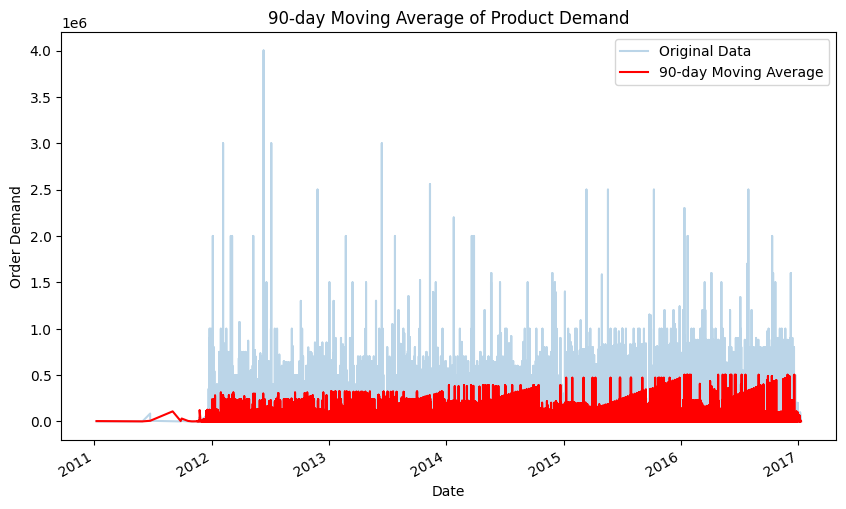

<Figure size 1200x800 with 0 Axes>

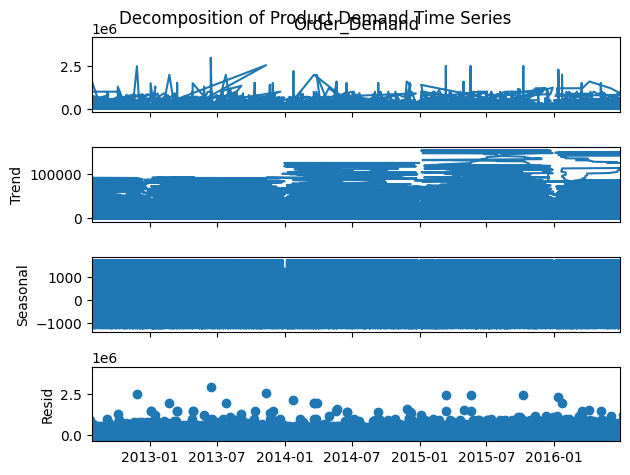

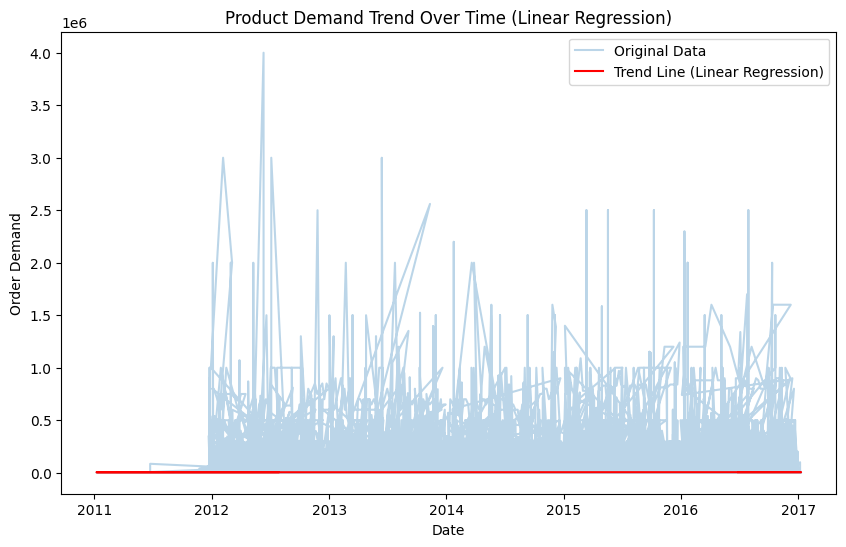

The slope of the trend is: 0.4454607459903993
The demand is increasing over time.


In [17]:
# Step 1: Moving Average Smoothing
df['Demand_MA_90'] = df['Order_Demand'].rolling(window=90).mean()  # 90-day moving average to capture long-term trends

plt.figure(figsize=(10, 6))
df['Order_Demand'].plot(alpha=0.3, label='Original Data')
df['Demand_MA_90'].plot(label='90-day Moving Average', color='red')
plt.title('90-day Moving Average of Product Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()

# Step 2: Trend Decomposition (Additive Model)
# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(df['Order_Demand'], model='additive', period=365)  # Assuming daily data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Decomposition of Product Demand Time Series')
plt.show()

# Step 3: Detecting the Overall Trend Using Linear Regression
# Prepare the data for linear regression by converting dates to a numerical format (ordinal)
df = df.reset_index()
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Use linear regression to detect the trend
X = df[['Date_Ordinal']]
y = df['Order_Demand']

# Fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Predict the trend using the linear model
df['Trend_Predicted'] = linear_reg.predict(X)

# Plot the actual demand data and the linear trend line
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Order_Demand'], label='Original Data', alpha=0.3)
plt.plot(df['Date'], df['Trend_Predicted'], label='Trend Line (Linear Regression)', color='red')
plt.title('Product Demand Trend Over Time (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()

# Step 4: Print the linear regression coefficient to determine the trend direction
slope = linear_reg.coef_[0]
print(f"The slope of the trend is: {slope}")
if slope > 0:
    print("The demand is increasing over time.")
elif slope < 0:
    print("The demand is decreasing over time.")
else:
    print("The demand is stable over time.")

In [ ]:
#V Seasonality Analysis

<Figure size 1200x800 with 0 Axes>

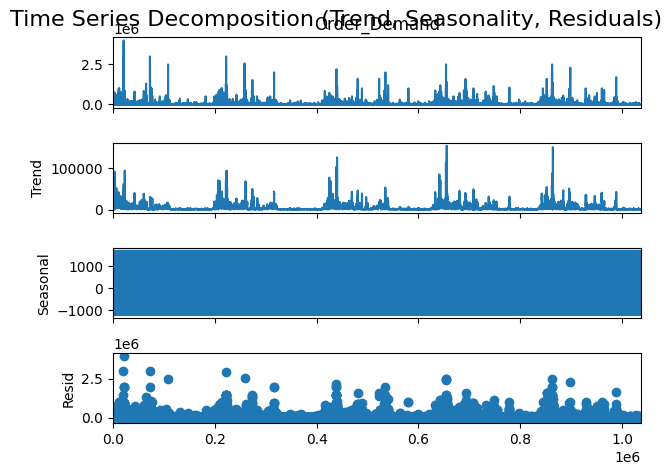

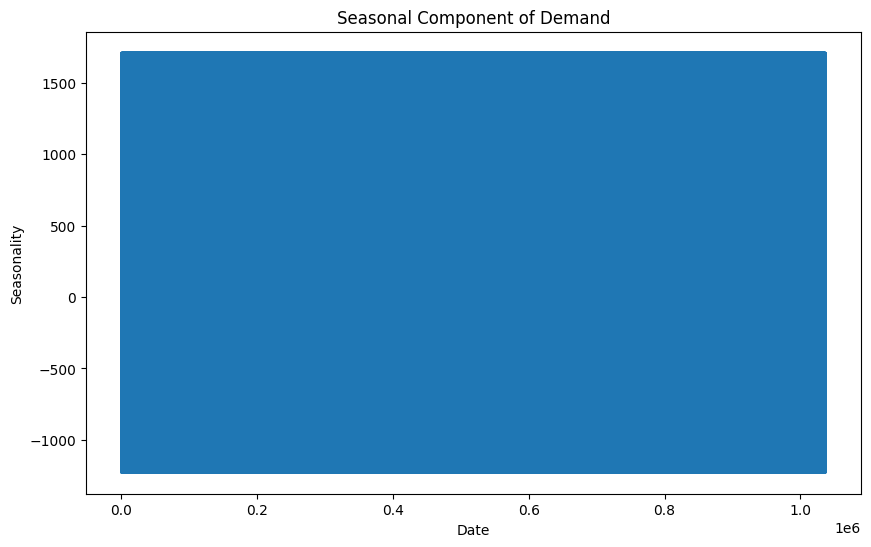

<Figure size 1000x600 with 0 Axes>

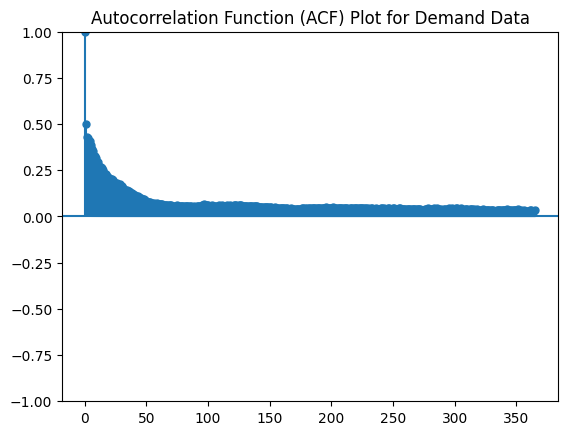

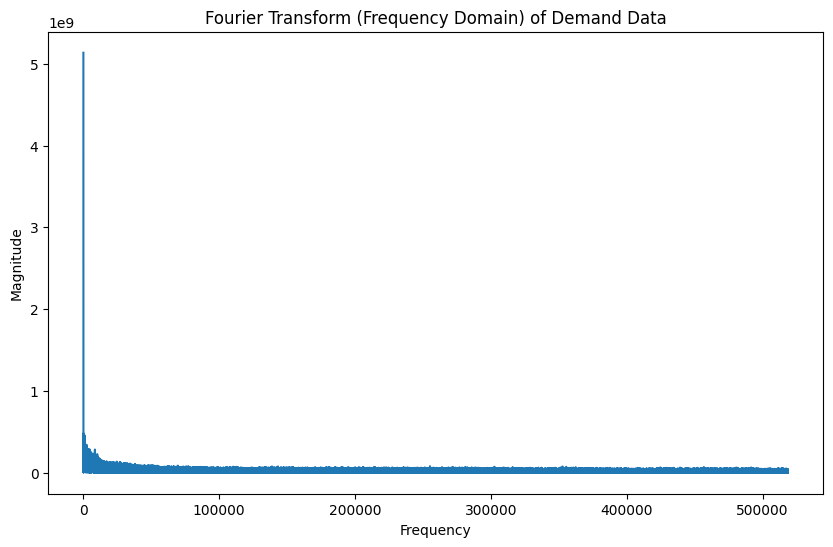

In [19]:
# Step 1: Decompose the time series to detect seasonality
# Assuming the data has a daily frequency
decomposition = seasonal_decompose(df['Order_Demand'], model='additive', period=365)  # Adjust period based on data

# Extract the seasonal component
seasonal = decomposition.seasonal

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition (Trend, Seasonality, Residuals)', fontsize=16)
plt.show()

# Step 2: Plot the seasonal component separately
plt.figure(figsize=(10, 6))
seasonal.plot()
plt.title('Seasonal Component of Demand')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.show()

# Step 3: Autocorrelation plot to detect repeating patterns (seasonality)
plt.figure(figsize=(10, 6))
plot_acf(df['Order_Demand'].dropna(), lags=365)  # Adjust the number of lags based on the dataset frequency
plt.title('Autocorrelation Function (ACF) Plot for Demand Data')
plt.show()

# Optional Step 4: Fourier Transform for advanced seasonality detection
# Use Fourier transform to detect cyclical patterns
from numpy.fft import fft

# Apply Fourier Transform to demand data
fft_values = fft(df['Order_Demand'].dropna())
fft_magnitude = abs(fft_values)

# Plot Fourier Transform results (Magnitude)
plt.figure(figsize=(10, 6))
plt.plot(fft_magnitude[:len(fft_magnitude)//2])  # We only need half of the spectrum
plt.title('Fourier Transform (Frequency Domain) of Demand Data')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Decomposition

<Figure size 1200x800 with 0 Axes>

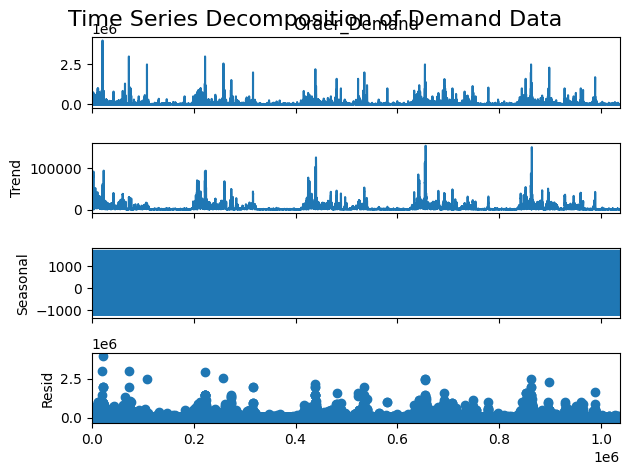

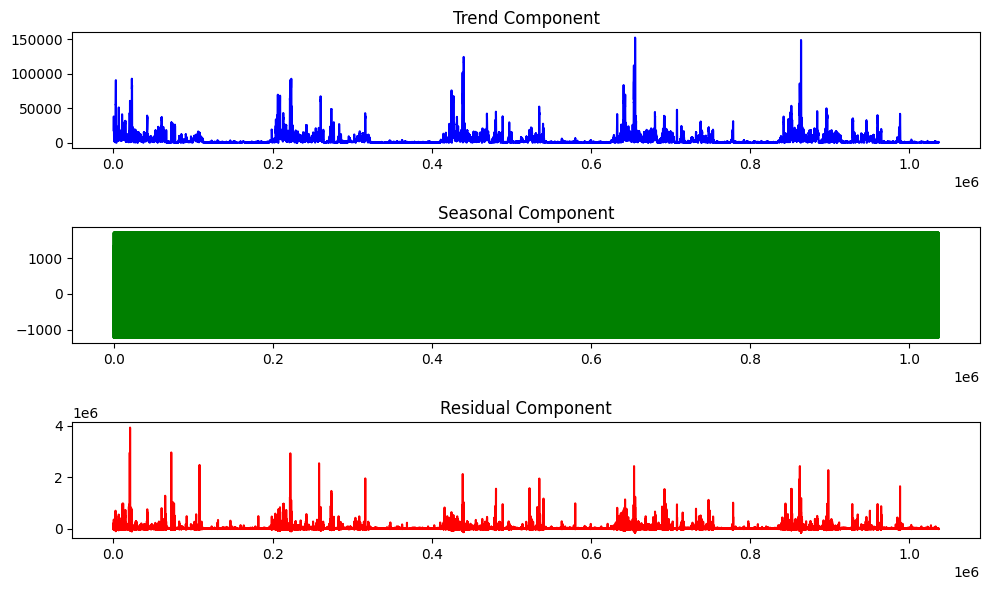

In [20]:
# Step 1: Perform time series decomposition
# 'model="additive"' assumes that the trend and seasonal components add together to form the time series
# Adjust 'period' based on the frequency of your data (e.g., 365 for daily data with yearly seasonality)
decomposition = seasonal_decompose(df['Order_Demand'], model='additive', period=365)  # Adjust period for your data

# Step 2: Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 3: Plot the decomposition results
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Demand Data', fontsize=16)
plt.show()

# Step 4: Optionally, visualize each component separately
plt.figure(figsize=(10, 6))

# Plot the trend component
plt.subplot(3, 1, 1)
plt.plot(df.index, trend, label='Trend', color='blue')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(3, 1, 2)
plt.plot(df.index, seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(3, 1, 3)
plt.plot(df.index, residual, label='Residual', color='red')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
# Further Analysis

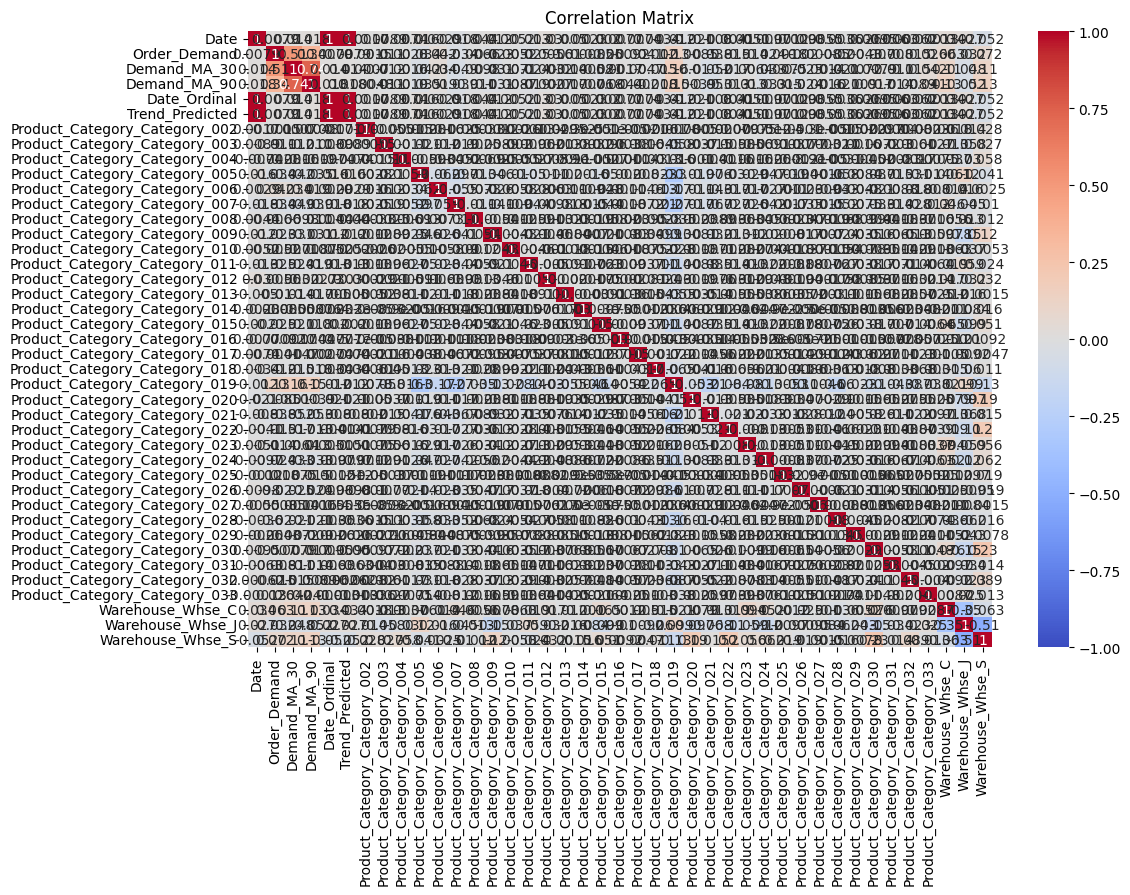

Correlations with Order_Demand:
 Order_Demand                     1.000000
Demand_MA_30                     0.507943
Demand_MA_90                     0.338891
Product_Category_Category_019    0.127393
Warehouse_Whse_S                 0.071504
Warehouse_Whse_C                 0.062907
Product_Category_Category_006    0.041848
Product_Category_Category_033    0.026301
Date                             0.007924
Trend_Predicted                  0.007924
Date_Ordinal                     0.007924
Product_Category_Category_025    0.001785
Product_Category_Category_027   -0.000852
Product_Category_Category_014   -0.000852
Product_Category_Category_016   -0.000923
Product_Category_Category_002   -0.001464
Product_Category_Category_004   -0.002848
Product_Category_Category_017   -0.004079
Product_Category_Category_029   -0.004300
Product_Category_Category_010   -0.005200
Product_Category_Category_012   -0.005594
Product_Category_Category_008   -0.006592
Product_Category_Category_030   -0.006964
P

In [25]:
# Step 1: One-hot encode the categorical variables (Product_Category and Warehouse)
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Warehouse'], drop_first=True)

# Step 2: Drop non-numeric columns (e.g., Product_Code)
df_encoded = df_encoded.drop(columns=['Product_Code'], errors='ignore')

# Step 3: Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Focus on correlations with Order_Demand
correlations_with_demand = correlation_matrix['Order_Demand'].sort_values(ascending=False)
print("Correlations with Order_Demand:\n", correlations_with_demand)